<a href="https://colab.research.google.com/github/ArtyomCoder/ML_projects/blob/main/opencv/OpenCv_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания


Используя полученные знания хочу попробовать сделать следующие пункты:
1. Найти фото любого известного актера или актрисы.
2. Распознать лицо на фотографии. Выделить лицо овалом.
3. Выделить на изображении глаза. Выделить их кружком. Возможно выбелить глаза с помощью очков.
4. Все лицо кроме глаз "заблюрить" (размыть).




# Решение

## Импорты

In [ ]:
import cv2
import gdown
import numpy as np
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

Функция для блюра

In [ ]:
def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)


## Решение с очками

Я загружаю файлы из хранилища одного из своих проектов в яндекс облаке.

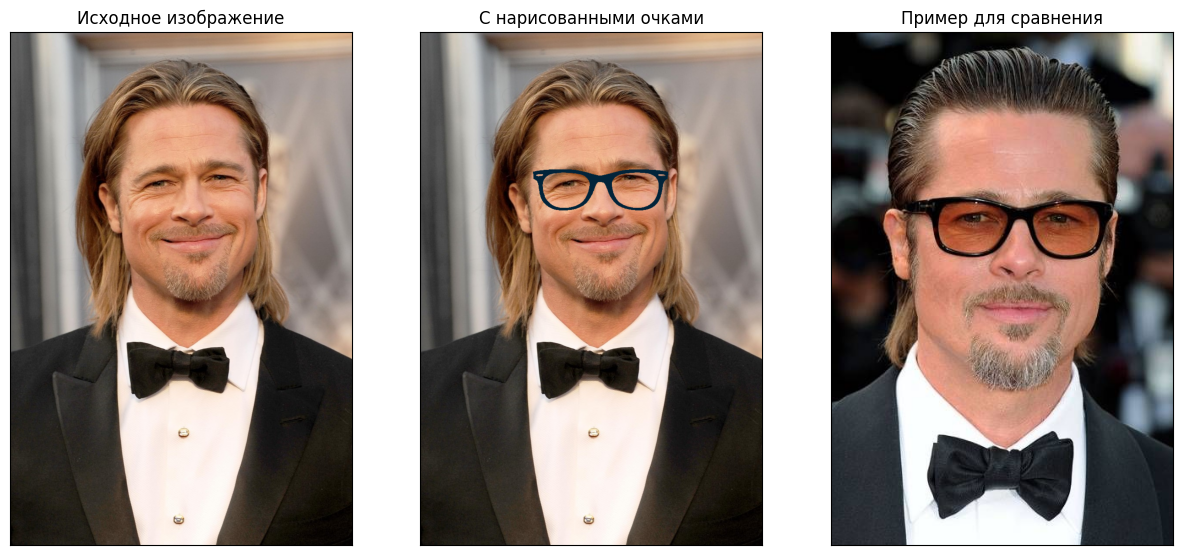

In [ ]:
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/brad_pitt.jpg', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/sunglasses.png', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/brad_pitt_in_sunglasses.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./brad_pitt.jpg')
img2 = img.copy()

# Загрузка Брэда Питта в очках для сравнения размеров
img_brad_in_sunglasses = cv2.imread('./brad_pitt_in_sunglasses.jpg')

# Загружаю очки
sunglasses_mask = cv2.imread('./sunglasses.png')
h_mask, w_mask = sunglasses_mask.shape[:2]

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_alt.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    center = (x + width//2, y + height//2)        # центр овала
    axes = (int(width * 0.5), int(height * 0.7))  # большая и малая оси
    angle = 0                                     # угол фигуры
    start_angle = 0                               # начальный угол отрисовки
    end_angle = 360                               # конечный угол отрисовки
    color = (0, 0, 255)                           # цвет линии
    thickness = 2                                 # толщина линии


    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    # координаты области глаз
    x_eyes, y_eyes = min(eyes[:, 0]), min(eyes[:, 1])
    w_eyes= max(eyes[:, 0] + eyes[:, 2]) - x_eyes
    h_eyes= max(eyes[:, 1] + eyes[:, 3]) - y_eyes
    # подгонка размера для очков
    x_eyes, y_eyes = int(x_eyes * 0), int(y_eyes * 0)
    w_eyes = int(w_eyes * 1.3)
    h_eyes = int(h_eyes * 2.3)

    # область с глазами
    eyes_zone = face[y_eyes:y_eyes+h_eyes, x_eyes:x_eyes+w_eyes]

    # масштабируем маску очков под размер области глаз
    sunglasses_mask_small = cv2.resize(sunglasses_mask, (w_eyes, h_eyes), interpolation=cv2.INTER_AREA)

    # Сделаем наши очки черно-белыми и применим инвариантный бинарный порог, как это делали с номерами
    gray_mask = cv2.cvtColor(sunglasses_mask_small, cv2.COLOR_BGR2GRAY)
    ret, glasses_mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

    # инвертированная маска
    mask_inv = cv2.bitwise_not(glasses_mask)

    # применяем маски
    masked_eyes = cv2.bitwise_and(sunglasses_mask_small, sunglasses_mask_small, mask=glasses_mask)
    masked_eyes_zone = cv2.bitwise_and(eyes_zone, eyes_zone, mask=mask_inv)

    # Объединяем глаза и очки
    face[y_eyes:y_eyes+h_eyes, x_eyes:x_eyes+w_eyes] = cv2.add(masked_eyes, masked_eyes_zone)



fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('С нарисованными очками')

ax3.imshow(cv2.cvtColor(img_brad_in_sunglasses, cv2.COLOR_BGR2RGB))
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
ax3.set_title('Пример для сравнения')

pyplot.show()


## Решение с кружочками

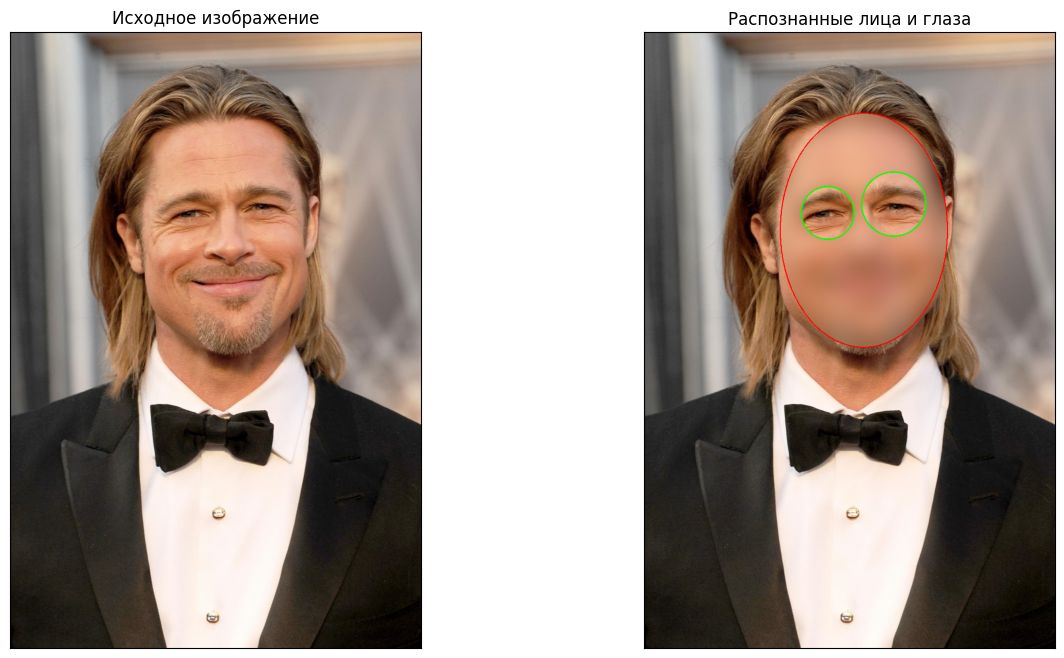

In [ ]:
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/brad_pitt.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./brad_pitt.jpg')
img2 = img.copy()

# создаю маску
mask_shape = (img.shape[0], img.shape[1], 1)  # форма маски
mask = np.full(mask_shape, 0, dtype=np.uint8) # нулевая маска

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_alt.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    center = (x + width//2, y + height//2)        # центр овала
    axes = (int(width * 0.5), int(height * 0.7))  # большая и малая оси
    angle = 0                                     # угол фигуры
    start_angle = 0                               # начальный угол отрисовки
    end_angle = 360                               # конечный угол отрисовки
    color = (0, 0, 255)                           # цвет линии
    thickness = 2                                 # толщина линии


    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # рисование овала (эллипса)
    xc, yc = center
    xr, yr = axes
    img2[yc-yr:yc+yr, xc-xr:xc+xr] = blur_face(img2[yc-yr:yc+yr, xc-xr:xc+xr])

    # рисование овала (эллипса)
    cv2.ellipse(img2, center, axes, angle, start_angle, end_angle, color, thickness)
    # делаю маску в форме эллипса для лица
    cv2.ellipse(mask, center, axes, angle, start_angle, end_angle, 255, -1)

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:
        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.25 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии

        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)
        # делаю прорези для глаз в маске
        cv2.circle(mask, (center[0]+x, center[1]+y), radius, 0, -1)


    mask_inv = cv2.bitwise_not(mask)
    img1_bg = cv2.bitwise_and(img, img, mask=mask_inv)
    img1_fg = cv2.bitwise_and(img2, img2, mask=mask)
    dst = cv2.add(img1_bg, img1_fg)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()


## Прочее

Тут я пытался улучшить вариант с очками. Пробовал накладывать очки под углом. А для этого вычислял угол наклона с помощью глаз. Но возникла проблема с повернутыми очками.

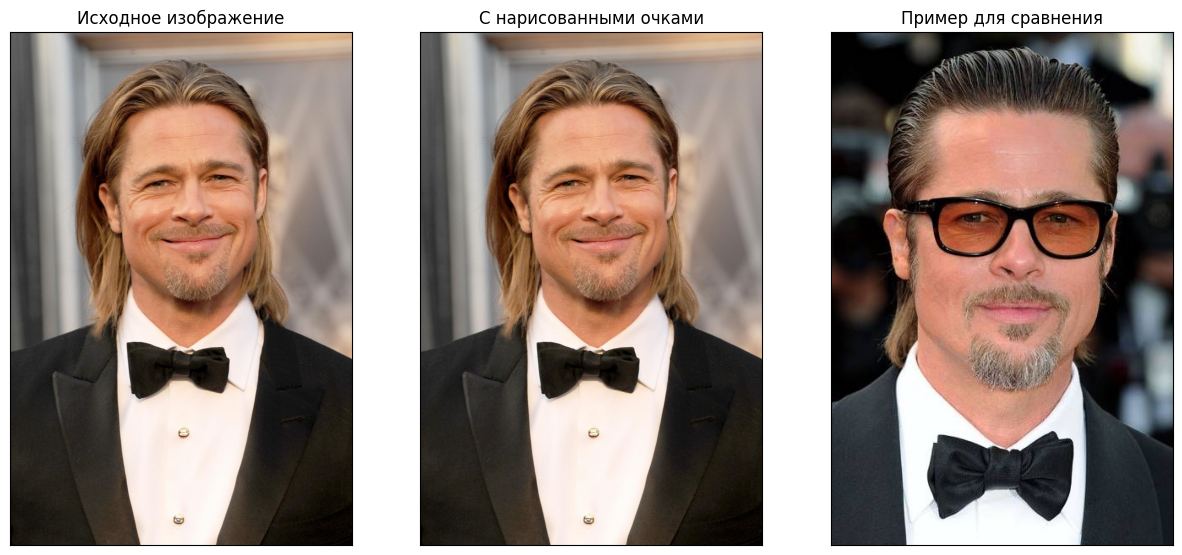

In [ ]:
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/brad_pitt.jpg', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/sunglasses.png', None, quiet=True)
gdown.download('https://storage.yandexcloud.net/simple-quiz-bot-storage/brad_pitt_in_sunglasses.jpg', None, quiet=True)

# Загрузка изображения
img = cv2.imread('./brad_pitt.jpg')
img2 = img.copy()

# Загрузка Брэда Питта в очках для сравнения размеров
img_brad_in_sunglasses = cv2.imread('./brad_pitt_in_sunglasses.jpg')

# Загружаю очки
sunglasses_mask = cv2.imread('./sunglasses.png')
h_mask, w_mask = sunglasses_mask.shape[:2]

# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_alt.xml")


# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    center = (x + width//2, y + height//2)        # центр овала
    axes = (int(width * 0.5), int(height * 0.7))  # большая и малая оси
    angle = 0                                     # угол фигуры
    start_angle = 0                               # начальный угол отрисовки
    end_angle = 360                               # конечный угол отрисовки
    color = (0, 0, 255)                           # цвет линии
    thickness = 2                                 # толщина линии


    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    # координаты области глаз
    x_eyes, y_eyes = min(eyes[:, 0]), min(eyes[:, 1])
    w_eyes= max(eyes[:, 0] + eyes[:, 2]) - x_eyes
    h_eyes= max(eyes[:, 1] + eyes[:, 3]) - y_eyes
    # подгонка размера для очков
    x_eyes, y_eyes = int(x_eyes * 0), int(y_eyes * 0)
    w_eyes = int(w_eyes * 1.3)
    h_eyes = int(h_eyes * 2.3)

    # область с глазами
    eyes_zone = face[y_eyes:y_eyes+h_eyes, x_eyes:x_eyes+w_eyes]

    # масштабируем маску очков под размер области глаз
    sunglasses_mask_small = cv2.resize(sunglasses_mask, (w_eyes, h_eyes), interpolation=cv2.INTER_AREA)

    eyes = sorted(eyes, key=lambda e: e[0])
    left_eye, right_eye = eyes[0], eyes[1]

    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(dy, dx))
    center = ((left_eye[0] + left_eye[2]) // 2, (right_eye[1] + right_eye[3]) // 2)
    matrix = cv2.getRotationMatrix2D(np.float64(center), -angle, 1.0)
    sunglasses_mask_small = cv2.warpAffine(sunglasses_mask_small,
                                           matrix,
                                           (w_eyes, h_eyes),
                                           flags=cv2.INTER_LINEAR,
                                           borderMode=cv2.BORDER_CONSTANT,
                                           borderValue=(0, 0, 0, 0))

    # Сделаем наши очки черно-белыми и применим инвариантный бинарный порог, как это делали с номерами
    gray_mask = cv2.cvtColor(sunglasses_mask_small, cv2.COLOR_BGR2GRAY)
    ret, glasses_mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

    # инвертированная маска
    mask_inv = cv2.bitwise_not(glasses_mask)

    # применяем маски
    masked_eyes = cv2.bitwise_and(sunglasses_mask_small, sunglasses_mask_small, mask=glasses_mask)
    # masked_eyes_zone = cv2.bitwise_and(eyes_zone, eyes_zone, mask=mask_inv)

    # Объединяем глаза и очки
    # face[y_eyes:y_eyes+h_eyes, x_eyes:x_eyes+w_eyes] = cv2.add(masked_eyes, masked_eyes_zone)
    # face[y_eyes:y_eyes+h_eyes, x_eyes:x_eyes+w_eyes] = masked_eyes



fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('С нарисованными очками')

ax3.imshow(cv2.cvtColor(img_brad_in_sunglasses, cv2.COLOR_BGR2RGB))
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
ax3.set_title('Пример для сравнения')

pyplot.show()


In [ ]:
eyes = sorted(eyes, key=lambda e: e[0])
left_eye, right_eye = eyes[0], eyes[1]

dx = right_eye[0] - left_eye[0]
dy = right_eye[1] - left_eye[1]
angle = np.degrees(np.arctan2(dy, dx))
center = ((left_eye[0] + left_eye[2]) // 2, (right_eye[1] + right_eye[3]) // 2)
matrix = cv2.getRotationMatrix2D(np.float64(center), -angle, 1.0)
glasses_rotated = cv2.warpAffine(sunglasses_mask_small,
                                 matrix,
                                 (w_eyes, h_eyes),
                                 flags=cv2.INTER_LINEAR,
                                 borderMode=cv2.BORDER_CONSTANT,
                                 borderValue=(0, 0, 0, 0))

In [ ]:
gray_mask = cv2.cvtColor(glasses_rotated, cv2.COLOR_BGR2GRAY)
ret, glasses_mask = cv2.threshold(gray_mask, 50, 255, cv2.THRESH_BINARY_INV)

array([[[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       ...,

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]],

       [[ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71],
        ...,
        [ 76, 112,  71],
        [ 76, 112,  71],
        [ 76, 112,  71]]], dtype=uint8)
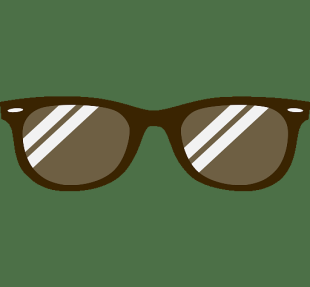

In [ ]:
sunglasses_mask_small

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
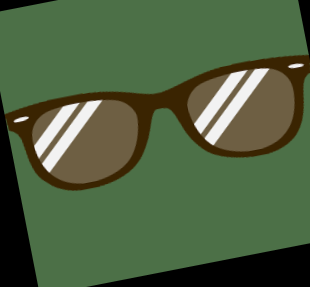

In [ ]:
glasses_rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
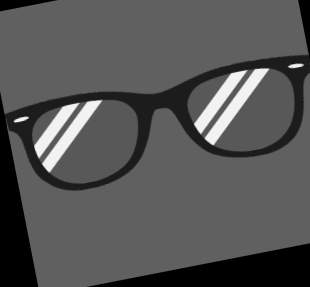

In [ ]:
gray_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
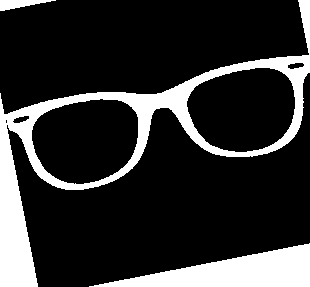

In [ ]:
glasses_mask

In [ ]:
d = dict()
for i in glasses_mask.reshape(287 * 310):
  if i in d:
    d[i] = d[i] + 1
  else:
    d[i] = 1

In [ ]:
d

{255: 16671, 0: 72299}